# House price Prediction

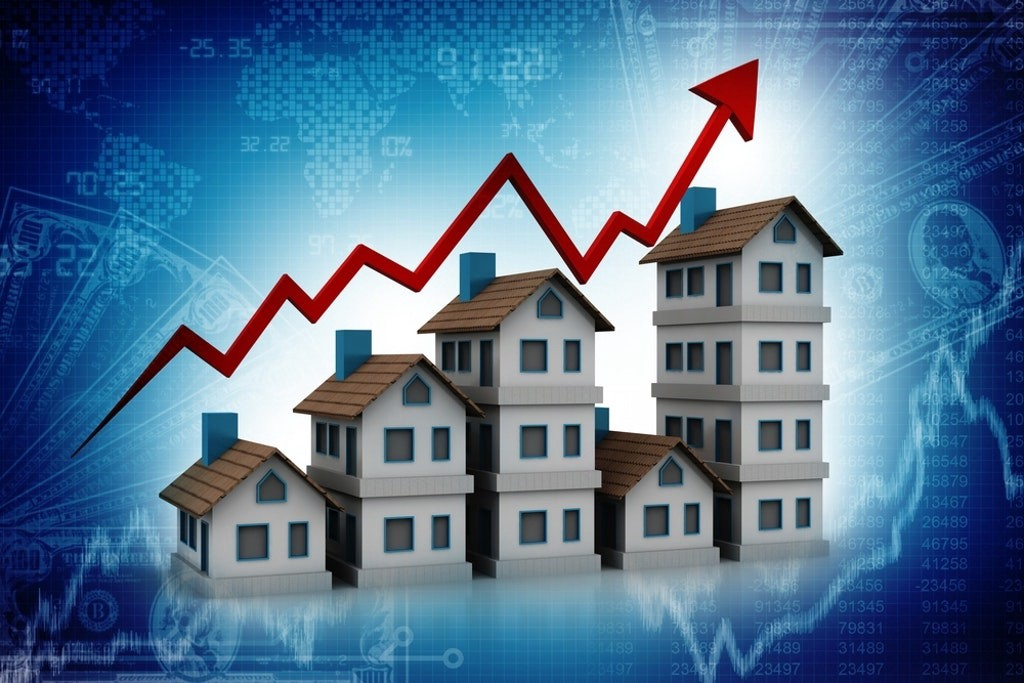

In [40]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



#### for data sets ---->     https://www.kaggle.com/shreayan98c/boston-house-price-prediction/data

In [24]:
# Importing the Boston Housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [25]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [26]:
# See head of the dataset
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [27]:
#Adding the feature names to the dataframe
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [43]:
#Adding target variable to dataframe
data['PRICE'] = boston.target 
# Median value of owner-occupied homes in $1000s

In [44]:
#Check the shape of dataframe
data.shape

(506, 14)

In [45]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [46]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [47]:
# Identifying the unique number of values in the dataset
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [48]:
# Check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [49]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [50]:
# Viewing the data statistics
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [51]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(14, 14)

<AxesSubplot:>

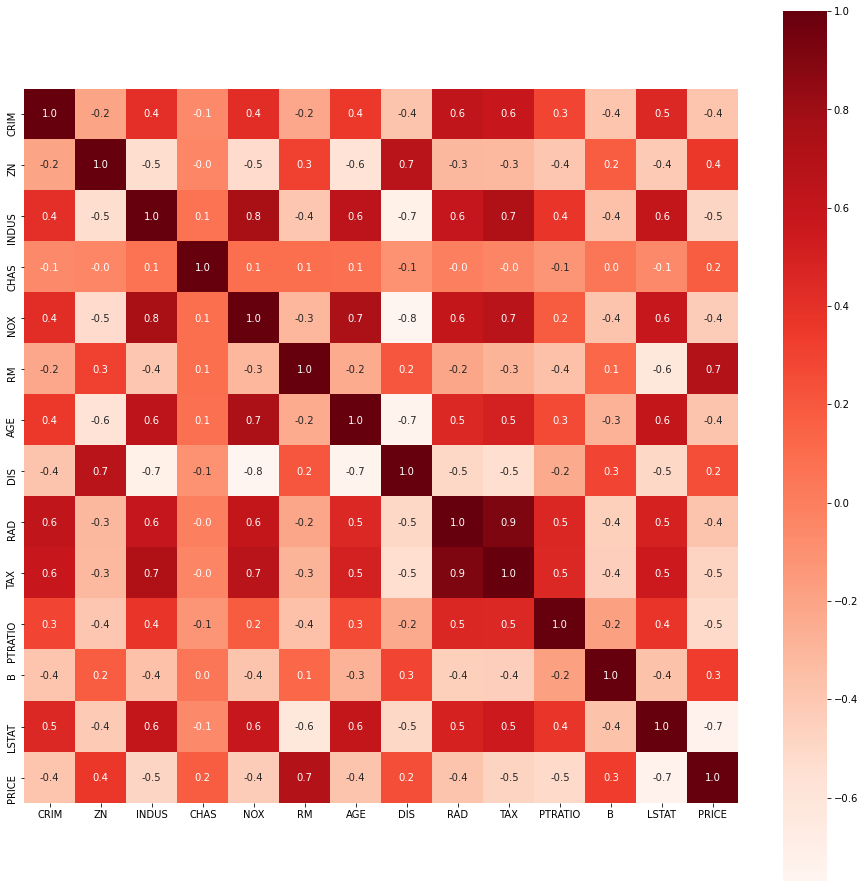

In [77]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Reds')

In [78]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [79]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

## Linear Regression

### Training model

In [80]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)

LinearRegression()

In [81]:
# Value of y intercept
lm.intercept_

36.357041376595205

In [82]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-0.12257
1,ZN,0.0556777
2,INDUS,-0.00883428
3,CHAS,4.69345
4,NOX,-14.4358
5,RM,3.28008
6,AGE,-0.00344778
7,DIS,-1.55214
8,RAD,0.32625
9,TAX,-0.0140666


### Model Evaluation

In [84]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [88]:
# Model Evaluation
print('R^2(r square )   :',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2     :',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Mean Absolute Error is    :',metrics.mean_absolute_error(y_train, y_pred))
print('Mean Square Error     :',metrics.mean_squared_error(y_train, y_pred))
print('R Mean Square Error     :',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2(r square )   : 0.7465991966746854
Adjusted R^2     : 0.736910342429894
Mean Absolute Error is    : 3.08986109497113
Mean Square Error     : 19.07368870346903
R Mean Square Error     : 4.367343437774162


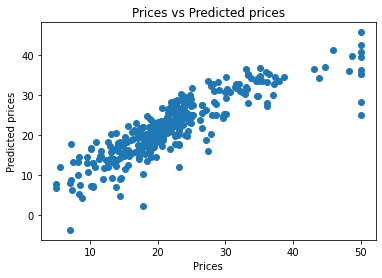

In [89]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

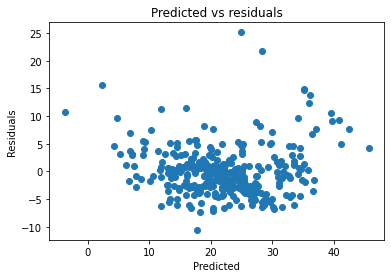

In [90]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


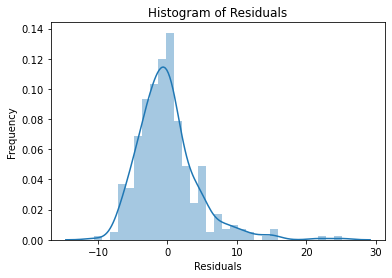

In [91]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Test nodel 

In [93]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [95]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2(r square )   :', acc_linreg)
print('Adjusted R^2     :',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Mean Absolute Error is    :',metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Square Error     :',metrics.mean_squared_error(y_test, y_test_pred))
print('R Mean Square Error     :',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2(r square )   : 0.7121818377409195
Adjusted R^2     : 0.6850685326005713
Mean Absolute Error is    : 3.8590055923707407
Mean Square Error     : 30.053993307124127
R Mean Square Error     : 5.482152251362974


#### here comparing between the  training and testing  model the values of R^2(r square ),Adjusted R^2 ,Mean Absolute Error,
#### Mean Square Error  and   R Mean Square Error   are about   nearer so the  our model is best 

### Random Forest

#### Train The model 

In [97]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation

In [98]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [100]:
# Model Evaluation
print('R^2(r square )   :',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2     :',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Mean Absolute Error is    :',metrics.mean_absolute_error(y_train, y_pred))
print('Mean Square Error     :',metrics.mean_squared_error(y_train, y_pred))
print('R Mean Square Error     :',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


R^2(r square )   : 0.9787319578495193
Adjusted R^2     : 0.9779187680025891
Mean Absolute Error is    : 0.8476299435028254
Mean Square Error     : 1.6008631779661027
R Mean Square Error     : 1.2652522191113134


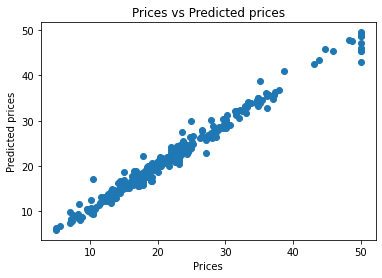

In [101]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

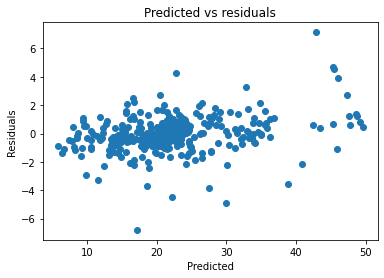

In [102]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## For Test Data

In [103]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [105]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2(r square )   :', acc_rf)
print('Adjusted R^2     :',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Mean Absolute Error is    :',metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Square Error     :',metrics.mean_squared_error(y_test, y_test_pred))
print('R Mean Square Error     :',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2(r square )   : 0.8394351375203374
Adjusted R^2     : 0.8243094620693546
Mean Absolute Error is    : 2.479756578947368
Mean Square Error     : 16.76619454605263
R Mean Square Error     : 4.094654386642739


## support Vector Machine Regressor

In [107]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train the model

In [108]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

In [109]:
# Train the model using the training sets 
reg.fit(X_train, y_train)

SVR()

### model Evaluation

In [110]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [112]:
# Model Evaluation
print('R^2(r square )   :',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2     :',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('Mean Absolute Error is    :',metrics.mean_absolute_error(y_train, y_pred))
print('Mean Square Error     :',metrics.mean_squared_error(y_train, y_pred))
print('R Mean Square Error     :',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2(r square )   : 0.6419097248941195
Adjusted R^2     : 0.628218037904777
Mean Absolute Error is    : 2.9361501059460293
Mean Square Error     : 26.953752101332935
R Mean Square Error     : 5.191700309275655


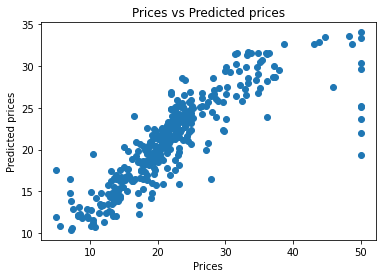

In [113]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

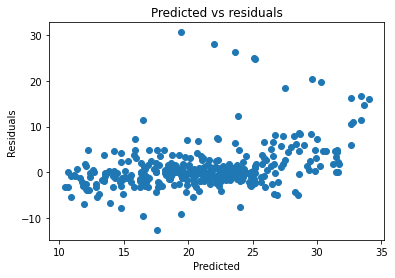

In [114]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### for Test Data 

In [116]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [118]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2(r square )   :', acc_svm)
print('Adjusted R^2     :',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Mean Absolute Error is    :',metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Square Error     :',metrics.mean_squared_error(y_test, y_test_pred))
print('R Mean Square Error     :',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2(r square )   : 0.5900158460478174
Adjusted R^2     : 0.5513941503856553
Mean Absolute Error is    : 3.7561453553021686
Mean Square Error     : 42.81057499010247
R Mean Square Error     : 6.542979060802691


## Comparison Between the model :

In [120]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_svm*100]})
models.sort_values(by='R-squared Score',   ascending=False)

,Model,R-squared Score
1,Random Forest,83.943514
0,Linear Regression,71.218184
2,Support Vector Machines,59.001585


###  Hence , we can conclude that the Random Forest = 83.94 % is the best prediciton for the house price .